In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

from helper import readFile
from helper import oneHotEncoder
from helper import showConfusionMarix
from NeuralNetwork import NeuralNetwork

%matplotlib inline

### Load data and One-Hot-Encode

In [2]:
# read the data
trainFeature, trainLabel = readFile('./data/train/lab/hw2train_labels.txt', './data/')
devFeature, devLabel = readFile('./data/dev/lab/hw2dev_labels.txt', './data/')
evalFeature, evalLabel = readFile('./data/eval/lab/hw2eval_labels.txt', './data/')

# One-Hot-Encode for labels
trainLabel = oneHotEncoder(trainLabel, 9)
devLabel = oneHotEncoder(devLabel, 9)
evalLabel = oneHotEncoder(evalLabel, 9)

In [3]:
# Universial Hyper-parameters
batchSize = 50
show = False

print('*' * 60)
print('Batch Size is:\t', batchSize, '\n')

************************************************************
Batch Size is:	 50 



### Relu non-linearity

In [4]:
print('ReLU Function')
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.1, 0.09, 0.08, 0.08, 0.06]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)
    
    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='relu', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)
    
    if show == True:
        # plot the training accuracy
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(trainAcc, 'g', label='Training Accuracy')
        ax.plot(cvAcc, 'r', label='Development Accuracy')
        ax.set_title('Convergence curve with ReLU and ' + str(hidden) + ' hidden nodes')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Accuracy')
        ax.legend(loc=4, fontsize=10)
        ax.grid('on')
        plt.show()
        
print('\n')

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Reach the maximum iteration	 90.25 s
Used time for one iteration (single batch): 	 0.00109 s
At 113 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.535177865613
Development Accuracy:	 0.441860465116
Evaluation Accuracy:	 0.39603960396
************************************************************
********************  Hidden node is 20 ********************
************************************************************
Reach the maximum iteration	 97.31 s
Used time for one iteration (single batch): 	 0.00123 s
At 99 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.621541501976
Development Accuracy:	 0.478796169631
Evaluation Accuracy:	 0.425742574257
************************************************************
********************  Hidden node is 30 *********

### Sigmoid non-linearity

In [5]:
print('Sigmoid Function')
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.3, 0.3, 0.3, 0.3, 0.3]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)
    
    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='sigmoid', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)
    
    if show == True:
        # plot the training accuracy
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(trainAcc, 'g', label='Training Accuracy')
        ax.plot(cvAcc, 'r', label='Development Accuracy')
        ax.set_title('Convergence curve with Sigmoid and ' + str(hidden) + ' hidden nodes')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Accuracy')
        ax.legend(loc=4, fontsize=10)
        ax.grid('on')
        plt.show()
        
print('\n')

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Reach the maximum iteration	 298.93 s
Used time for one iteration (single batch): 	 0.00524 s
At 100 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.594861660079
Development Accuracy:	 0.452804377565
Evaluation Accuracy:	 0.426842684268
************************************************************
********************  Hidden node is 20 ********************
************************************************************
Reach the maximum iteration	 324.65 s
Used time for one iteration (single batch): 	 0.00576 s
At 132 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.728458498024
Development Accuracy:	 0.492476060192
Evaluation Accuracy:	 0.453245324532
************************************************************
********************  Hidden node is 30 *****

### Tanh non-linearity

In [6]:
print('Tahh Function')
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.3, 0.3, 0.3, 0.3, 0.3]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)

    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='tanh', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)
    
    if show == True:
        # plot the training accuracy
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(trainAcc, 'g', label='Training Accuracy')
        ax.plot(cvAcc, 'r', label='Development Accuracy')
        ax.set_title('Convergence curve with Tanh and ' + str(hidden) + ' hidden nodes')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Accuracy')
        ax.legend(loc=4, fontsize=10)
        ax.grid('on')
        plt.show()
        
print('\n')

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Reach the maximum iteration	 446.39 s
Used time for one iteration (single batch): 	 0.00798 s
At 467 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.674308300395
Development Accuracy:	 0.466484268126
Evaluation Accuracy:	 0.430143014301
************************************************************
********************  Hidden node is 20 ********************
************************************************************
Reach the maximum iteration	 330.62 s
Used time for one iteration (single batch): 	 0.00583 s
At 207 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.657312252964
Development Accuracy:	 0.49658002736
Evaluation Accuracy:	 0.447744774477
************************************************************
********************  Hidden node is 30 ******

### Best Model

* Sigmoid activation function
* 50 hidden nodes
* 0.3 learning rate
* 50 batch size

In [7]:
# create the Neural Network classifier
nn = NeuralNetwork(netSize=(50, 50, 9), loss='sigmoid', maxIter=500, 
                   batchSize=50, learningRate=0.3, CV=True)

# train the model
test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
# get the accuracy
trainAcc, cvAcc, w = nn.getParams()
# get the accuracy information
index = np.argmax(cvAcc[50:]) + 50
wBest = w[index]
# get the evaluation accuracy
testAcc = nn.evaluate(evalFeature, evalLabel, wBest)

print('At', index + 1, 'th iteration, reach the maximum development accuracy')
print('Training Accuracy:\t', trainAcc[index])
print('Development Accuracy:\t', cvAcc[index])
print('Evaluation Accuracy:\t', testAcc)

if show == True:
    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with Sigmoid and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()
        
print('\n')

Reach the maximum iteration	 237.64 s
Used time for one iteration (single batch): 	 0.00402 s
At 175 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.910671936759
Development Accuracy:	 0.507523939808
Evaluation Accuracy:	 0.41804180418




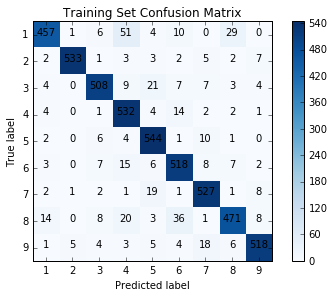

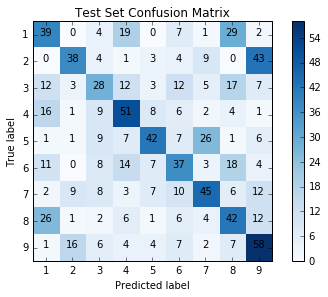

In [8]:
# get the train label and predction
trainPredict = oneHotEncoder(np.array([nn.predict(trainFeature, wBest)]).T, 9)
trainMatrix = np.dot(trainLabel.T, trainPredict)

# get the test label and predction
testPredict = oneHotEncoder(np.array([nn.predict(evalFeature, wBest)]).T, 9)
testMatrix = np.dot(evalLabel.T, testPredict)

# plot the confusion matrix
fig1 = showConfusionMarix(trainMatrix, title='Training Set Confusion Matrix', 
                          label=[str(i) for i in range(1, 10)])
fig1.savefig('./result/trainMatrix.pdf')

fig2 = showConfusionMarix(testMatrix, title='Test Set Confusion Matrix', 
                          label=[str(i) for i in range(1, 10)])
fig2.savefig('./result/testMatrix.pdf')